In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()
positive_patches = faces.images

In [4]:
positive_patches.shape

(13233, 62, 47)

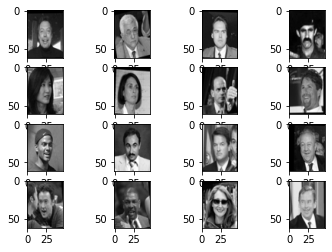

In [5]:
import matplotlib.pyplot as plt
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(positive_patches[i,:,:] , cmap='gray')

In [6]:
from skimage import color, feature
import skimage.data
sample= positive_patches[4]

img = color.rgb2gray(sample)
hog_vec, hog_vis = feature.hog(img, visualize=True)
plt.subplot(1,2,1) ,plt.imshow(sample,cmap='gray')
plt.subplot(1,2,2) ,plt.imshow(hog_vis,cmap='gray')

ValueError: the input array must have size 3 along `channel_axis`, got (62, 47)

In [6]:
from skimage import data, transform
import numpy as np
from sklearn.feature_extraction.image import PatchExtractor
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):

    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
    max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
      patches = np.array([transform.resize(patch, patch_size)
    for patch in patches])
    return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale)
      for im in images for scale in [0.5, 1.0, 2.0]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


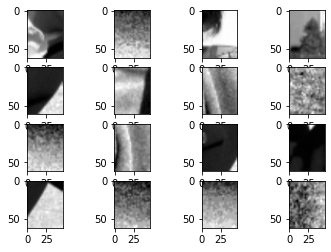

In [7]:
import matplotlib.pyplot as plt
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(negative_patches[i,:,:], cmap='gray')

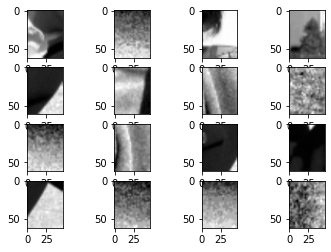

In [8]:
import matplotlib.pyplot as plt
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(negative_patches[i,:,:] , cmap='gray')

In [9]:
hog_vec.shape

(1215,)

In [10]:
#dataset equilibree
n  = min(positive_patches.shape[0],negative_patches.shape[0])
dim=hog_vec.shape[0]
Y=np.concatenate((np.ones((n,1)), np.zeros((n,1))), axis=0)
X=np.zeros((2*n,dim)) 
for i in range (n) : 
  img=positive_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  X[i,:]=hog_vec.reshape(1,dim)
for i in range(n):
  img=negative_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  X[i+n,:]=hog_vec.reshape(1,dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  del sys.path[0]


In [11]:
dict = {'data':X , 'labels':Y}
print(dict)

{'data': array([[0.25548458, 0.29600387, 0.07282983, ..., 0.03964323, 0.04323808,
        0.08991418],
       [0.06110074, 0.02669912, 0.13924529, ..., 0.07784682, 0.05735707,
        0.17604994],
       [0.26090473, 0.26090473, 0.0086068 , ..., 0.0026164 , 0.0055565 ,
        0.00378414],
       ...,
       [0.1404805 , 0.10580823, 0.22685768, ..., 0.04952962, 0.0505105 ,
        0.        ],
       [0.18195421, 0.08145586, 0.07543442, ..., 0.12509677, 0.24958529,
        0.23331585],
       [0.01993946, 0.02290046, 0.0118614 , ..., 0.05916161, 0.12874733,
        0.11324444]]), 'labels': array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])}


In [12]:
import numpy as np
file = open("face_data.npy","wb")
np.save(file,X)
file.close

file= open("face_labels.npy","wb")
np.save(file,Y)
file.close

<function BufferedWriter.close>

In [13]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# View the shape of the data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((21172, 1215), (5294, 1215), (21172, 1), (5294, 1))

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [15]:
models = [
{ "estimater": KNeighborsClassifier(),
"params": {
"n_neighbors": [25],
"weights": ['uniform'],
"leaf_size": [25],
"p": [1],
}
},
{ "estimater": DecisionTreeClassifier(),
"params": {
"criterion": ['gini'],
"splitter": ['best'],
"max_depth": [None],
"max_features": [None],
"random_state": [42]
}
},
{ "estimater": svm.SVC(),
"params": {'C': [0.1 ], 'gamma': [1], 'kernel': ['rbf']
}
},
{ "estimater": RandomForestClassifier(),
"params": {
"criterion": ['gini'],
"bootstrap": [True],
"max_depth": [85],
"max_features": ['sqrt'],
"n_estimators": [60],
"random_state": [42]
}
}
]
column_names = ["KNeighbors"]
entries = []
max_acc = 0
best_model = None
for model in models:
   print(model["estimater"])
# Create model
clf = model["estimater"]
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = model["params"],cv = 5)
# Fit the model
grid_search.fit(X_train, Y_train);
# Make predictions on the test set compute accuracy metric
predicted = grid_search.predict(X_test)
acc = accuracy_score(predicted, Y_test)
entries.append(acc)
print(grid_search.best_params_)
# Get the best model with the highest accuracy
if acc > max_acc:
  max_acc = acc
best_model = grid_search

KNeighborsClassifier()
DecisionTreeClassifier()
SVC()
RandomForestClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 85, 'max_features': 'sqrt', 'n_estimators': 60, 'random_state': 42}


In [16]:
print(models[0])

{'estimater': KNeighborsClassifier(), 'params': {'n_neighbors': [25], 'weights': ['uniform'], 'leaf_size': [25], 'p': [1]}}


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


    Estimator  Accuracy
0  KNeighbors  0.989611


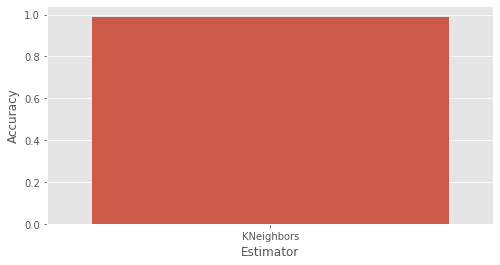

In [18]:
plt.style.use('ggplot')
df = pd.DataFrame({"Estimator": column_names, "Accuracy": entries})
plt.figure(figsize=(8, 4))
sns.barplot(x='Estimator', y='Accuracy', data=df)
print(df)

**Conclusion:** 
nous utilisons la bibliothèque Python OpenCV, comme un outil qui accélère l'identification de Face, de manière agile et efficace.
À l'aide de cet article, le Data Scientist pourra mettre en œuvre d'autres applications de Visual Computing, telles que l'identification de l'utilisation de masques, la température corporelle, la distance sociale dans les supermarchés, l'identification d'objets, la reconnaissance faciale, le suivi d'objets en temps réel.

Question 9:

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
 """
 Performs evaluation comparison on y_true labels vs. y_pred labels
 on a classification.
 """
 accuracy = accuracy_score(y_true, y_preds)
 precision = precision_score(y_true, y_preds, average='micro')
 recall = recall_score(y_true, y_preds, average='micro')
 f1 = f1_score(y_true, y_preds, average='micro')
 metric_dict = {"accuracy": round(accuracy, 2),
 "precision": round(precision, 2),
 "recall": round(recall, 2),
 "f1": round(f1, 2)}
 
 return metric_dict

In [20]:
y_preds=best_model.predict(X_test)
dict_perf=evaluate_preds(Y_test,y_preds)
print(dict_perf)

{'accuracy': 0.99, 'precision': 0.99, 'recall': 0.99, 'f1': 0.99}


4. Finding Faces in a New Image
We run a sliding window over a new image and evaluate each patch:

**Question 10:** Get a new test image by executing this script:

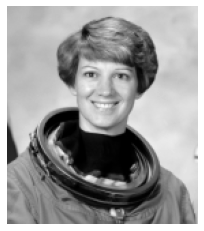

In [21]:
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');


Question 11 :

In [23]:
def sliding_window(img, patch_size=positive_patches[0].shape, istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
               patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])


**Question 12 :**

In [25]:
labels =best_model.predict(patches_hog)
labels.sum()


68.0

**Question 13 :**

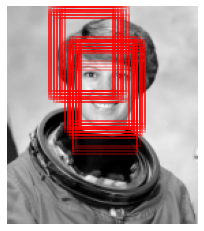

In [26]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
  ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                             alpha=0.3, lw=2, facecolor='none'))

5. Model Deployment with Python and Streamlit
**Question 14:**

In [28]:
import joblib

In [32]:
joblib.dump(best_model, "hind.sav")

['hind.sav']

In [33]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 13.1 MB/s 
     |████████████████████████████████| 237 kB 85.9 MB/s 
     |████████████████████████████████| 182 kB 88.5 MB/s 
     |████████████████████████████████| 164 kB 89.3 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 4.7 MB 57.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=97d386cc568734084779a22ee21e6bca269b3ca298174dbdb95b29dea846ea9b
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [35]:
import streamlit as st
import pandas as pd
import numpy as np
